__Exercício 1: Tratando séries temporais indexadas por tempo__

* Na instrução prática anterior foram utilizadas séries temporais de estações meteorológicas para extrair dados de diferentes anos e comparar as informações sobre temperaturas e e precipitações. Em uma das tarefas se solicitou para criar um ``MultiIndex`` para agregar os dois datasets em apenas um com as dimensões anos, messes do ano e dias do mês. Na tarefa seguinte foi construído um ``DateTimeIndex`` para as séries de dados. Com base no dataset indexado com o ``DateTimeIndex``. 
1. Analisando as colunas relacionadas e precipitações e temperaturas, mostre num subplot a evolução das temperaturas médias e acumulado de precipitações nos tres anos.
2. Prepare um gráfico que mostre como foi o acumulado de precipitações de Junho nos trÊs anos.
3. Prepare um gráfico que mostre como foi a temperatura media de cada um dos dias de Março nos três anos.
3. Considere uma aproximação para as estações do ano no brasil dada por: Verão (Janeiro, Fevereiro e Março), Outono (Abril, Maio e Junho), Inverno (Julho, Agosto e Setembro) Primavera (Outubro, Novembro e Dezembro). Prepare um gráfico que mostre como se comportaram as temperaturas máxima e mínima de cada uma das estações nos tres anos. 
4. Repare que os dados de cada estação são monitorando de hora em hora. Considere os intervalos de um dia como sendo: Madrugada (00:00 a 06:00), Manha (06:00 a 12:00), Tarde (12:00 a 18:00) e Noite (18:00 a 00:00). Crie um gráfico que mostre com se comportou a temperatura  temperatura media o dia 28 de setembro  em cada um dos intervalos do dia dos três anos.

<img align="center" style="padding-right:10px;" src="Figuras/IP-01-fig_01.png">

# INSTRUÇÃO PRÁTICA - IP-P008
## PP - PROGRAMAÇÃO EM PYTHON
### OBJETIVOS DA ATIVIDADE

Revisar e consolidar o conteúdo de __Pandas__ avançado.

In [80]:
import pandas as pd

df2003 = pd.read_csv("INMET_CO_DF_A001_BRASILIA_01-01-2003_A_31-12-2003.CSV", encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)
df2013 = pd.read_csv("INMET_CO_DF_A001_BRASILIA_01-01-2013_A_31-12-2013.CSV", encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)
df2023 = pd.read_csv("INMET_CO_DF_A001_BRASILIA_01-01-2023_A_31-12-2023.CSV", encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)

df2003.drop(["Unnamed: 19"], axis=1, inplace=True)
df2013 .drop(["Unnamed: 19"], axis=1, inplace=True)
df2023.drop(["Unnamed: 19"], axis=1, inplace=True)

df2023.rename(columns={'Data':'DATA (YYYY-MM-DD)', 'Hora UTC':'HORA (UTC)', 'RADIACAO GLOBAL (Kj/m²)': 'RADIACAO GLOBAL (KJ/m²)'}, inplace=True)

df = pd.concat([df2003,df2013,df2023])
df["HORA (UTC)"] = df["HORA (UTC)"].apply(lambda x: int(str(x)[0:2]))
data = df["DATA (YYYY-MM-DD)"].values
index = pd.DatetimeIndex(data, name="DATA")
df.drop("DATA (YYYY-MM-DD)", axis=1, inplace=True)
df.set_index(index, inplace=True)

In [81]:
df

,HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
DATA,,,,,,,,,,,,,,,,,,
2003-01-01,0,0.0,886.9,887.0,886.5,-9999.0,20.3,18.8,20.4,20.2,18.9,18.7,91.0,90.0,91.0,308.0,2.1,1.4
2003-01-01,1,0.0,887.3,887.3,886.9,-9999.0,19.9,18.5,20.3,19.9,18.8,18.5,92.0,91.0,92.0,302.0,2.2,1.3
2003-01-01,2,0.0,887.8,887.8,887.3,-9999.0,19.8,18.5,20.1,19.8,18.8,18.4,92.0,92.0,92.0,302.0,2.7,1.6
2003-01-01,3,0.0,886.9,887.8,886.9,-9999.0,19.5,18.5,19.8,19.5,18.6,18.4,94.0,92.0,94.0,295.0,3.4,2.0
2003-01-01,4,0.0,886.8,886.9,886.7,-9999.0,19.2,18.0,19.5,19.2,18.5,18.0,94.0,93.0,93.0,313.0,3.9,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19,0.0,884.2,885.2,884.2,1252.2,26.1,18.4,28.1,26.0,19.0,16.9,64.0,52.0,63.0,1.0,5.3,2.1
2023-12-31,20,0.0,883.7,884.3,883.7,1178.8,27.7,18.1,27.7,25.8,18.2,16.9,62.0,53.0,56.0,314.0,5.2,1.9
2023-12-31,21,0.0,883.5,883.7,883.4,873.0,25.5,17.4,27.7,25.5,18.0,16.9,62.0,52.0,61.0,300.0,5.1,2.7


In [82]:
mi = []
for columns in df.columns:
    a = (columns,"")
    if(columns.find("PRESSAO")>-1 or columns.find("PRESSÃO")>-1):
        a = ("PRESSÃO",columns)
    if(columns.find("TEMPERATURA")>-1):
        a = ("TEMPERATURA",columns)
    if(columns.find("UMIDADE")>-1):
        a = ("UMIDADE",columns)
    if(columns.find("VENTO")>-1):
        a = ("VELOCIDADE DO VENTO",columns)
    mi.append(a)

df.columns = pd.MultiIndex.from_tuples(mi)
df

HORA (UTC) PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
                                                         
DATA                                                     
2003-01-01          0                              0.0   
2003-01-01          1                              0.0   
2003-01-01          2                              0.0   
2003-01-01          3                              0.0   
2003-01-01          4                              0.0   
...               ...                              ...   
2023-12-31         19                              0.0   
2023-12-31         20                              0.0   
2023-12-31         21                              0.0   
2023-12-31         22                              0.0   
2023-12-31         23                              0.0   

                                                         PRESSÃO  \
           PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   
DATA                                                               
2003-01-01                                              886.9      
2003-01-01                                              887.3      
2003-01-01                                              887.8      
2003-01-01                                              886.9      
2003-01-01                                              886.8      
...                                                       ...      
2023-12-31                                              884.2      
2023-12-31                                              883.7      
2023-12-31                                              883.5      
2023-12-31                                              884.5      
2023-12-31                                              885.3      

                                                            \
           PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   
DATA                                                         
2003-01-01                                           887.0   
2003-01-01                                           887.3   
2003-01-01                                           887.8   
2003-01-01                                           887.8   
2003-01-01                                           886.9   
...                                                    ...   
2023-12-31                                           885.2   
2023-12-31                                           884.3   
2023-12-31                                           883.7   
2023-12-31                                           884.5   
2023-12-31                                           885.3   

                                                             \
           PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)   
DATA                                                          
2003-01-01                                            886.5   
2003-01-01                                            886.9   
2003-01-01                                            887.3   
2003-01-01                                            886.9   
2003-01-01                                            886.7   
...                                                     ...   
2023-12-31                                            884.2   
2023-12-31                                            883.7   
2023-12-31                                            883.4   
2023-12-31                                            883.5   
2023-12-31                                            884.5   

           RADIACAO GLOBAL (KJ/m²)  \
                                     
DATA                                 
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
...                            ...   
2023-12-31                  1252.2   
2023-12-31                  1178.8   
2023-12-31                   873.0   
2023-12-31                   104.0   

In [109]:
tempMedia = df.groupby([df.index.date])["TEMPERATURA"].mean()

precipAcum = df.groupby(df.index.year)["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].cumsum()



In [113]:
print(tempMedia.index)
print(50*"-")
print(precipAcum.index)

Index([2003-01-01, 2003-01-02, 2003-01-03, 2003-01-04, 2003-01-05, 2003-01-06,
       2003-01-07, 2003-01-08, 2003-01-09, 2003-01-10,
       ...
       2023-12-22, 2023-12-23, 2023-12-24, 2023-12-25, 2023-12-26, 2023-12-27,
       2023-12-28, 2023-12-29, 2023-12-30, 2023-12-31],
      dtype='object', length=1095)
--------------------------------------------------
DatetimeIndex(['2003-01-01', '2003-01-01', '2003-01-01', '2003-01-01',
               '2003-01-01', '2003-01-01', '2003-01-01', '2003-01-01',
               '2003-01-01', '2003-01-01',
               ...
               '2023-12-31', '2023-12-31', '2023-12-31', '2023-12-31',
               '2023-12-31', '2023-12-31', '2023-12-31', '2023-12-31',
               '2023-12-31', '2023-12-31'],
              dtype='datetime64[ns]', name='DATA', length=26280, freq=None)


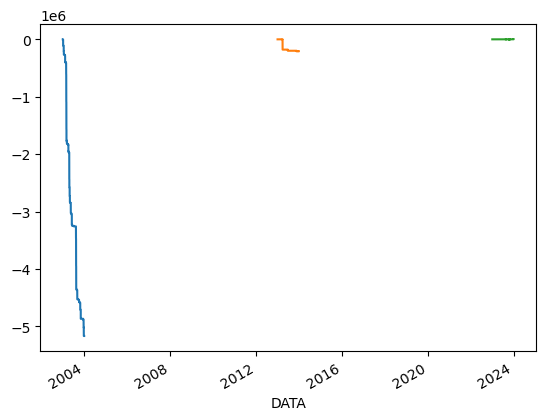

In [108]:
import matplotlib.pyplot as plt

anos = [2003,2013,2023]
fig = plt.figure

for ano in anos:
    precipAcum[df.index.year==ano].plot()
